<a href="https://colab.research.google.com/github/srijita1406/Data-Analytics/blob/main/Vigenere_Cypher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def textstrip(filename):
  '''This takes the file and converts it to a string with all the spaces and other
  special characters removed. What remains is only the lower case letters,
  retain only the lowercase letters!
  '''
  alpha = string.ascii_lowercase # string of lowercae letters
  f = open(filename, "r").read() # open file, "r" means that this file is supposed to be read only.
  f = f.replace("\n", "").lower() # replace all \n with empty string
  T = "" # remove all none alphabetic charecters
  for x in f:
    if x in alpha:
      T += x
  return T

In [ ]:
S = textstrip("/content/drive/MyDrive/sherlock.txt") # testcase
f = open("textstripped.txt", "w").write(S)
from google.colab import files
files.download('textstripped.txt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def letter_distribution(s):
  '''Consider the string s which comprises of only lowercase letters. Count
  the number of occurrences of each letter and return a dictionary'''
  alpha = string.ascii_lowercase
  d = dict.fromkeys(alpha, 0) # creating dict with keys as all alphabets and values 0 for each key
  for x in alpha: # incrementing value of count for each alphabet
    for y in s:
      if y == x:
        d[x]+=1
  return d
print(letter_distribution(S)) # testcase

# alternate method
# def letter_distribution(s):
#   '''Consider the string s which comprises of only lowercase letters. Count
#   the number of occurrences of each letter and return a dictionary'''
#   alpha = string.ascii_lowercase # string of all lowercase letters
#   d = {} #initialize empty dict
#   for x in alpha: # inititalize dict 
#     d[x] = 0 
#   for x in s: # increment for each letter in dict
#     d[x] = d[x] + 1
#   return d # answer 
# print(letter_distribution(S)) # test case
#   # d = dict.fromkeys(alpha, 0)

{'a': 19696, 'b': 3568, 'c': 5932, 'd': 10456, 'e': 30051, 'f': 5165, 'g': 4350, 'h': 16759, 'i': 17081, 'j': 157, 'k': 1935, 'l': 9713, 'm': 6640, 'n': 16399, 'o': 19346, 'p': 3795, 'q': 191, 'r': 14419, 's': 15336, 't': 22671, 'u': 7479, 'v': 2606, 'w': 6463, 'x': 377, 'y': 5243, 'z': 112}


In [ ]:
def substitution_encrypt(s,d):
  '''encrypt the contents of s by using the dictionary d which comprises of
  the substitutions for the 26 letters. Return the resulting string'''
  T = "" # initialize empty string
  for x in s: # iterate over given string
    T = T + d[x] # shift each letter acc to given dict and append it to T
  return T

In [ ]:
# testcase
import string
alpha = string.ascii_lowercase
# d = {}
# for x in range(len(alpha)):
#   d[alpha[x]] = alpha[(x+7)%26
d = {alpha[x]:alpha[(x+7)%26] for x in range(len(alpha))} 
print(d)
print(S[:100])
encrypted = substitution_encrypt(S,d)
print(encrypted[:100])

{'a': 'h', 'b': 'i', 'c': 'j', 'd': 'k', 'e': 'l', 'f': 'm', 'g': 'n', 'h': 'o', 'i': 'p', 'j': 'q', 'k': 'r', 'l': 's', 'm': 't', 'n': 'u', 'o': 'v', 'p': 'w', 'q': 'x', 'r': 'y', 's': 'z', 't': 'a', 'u': 'b', 'v': 'c', 'w': 'd', 'x': 'e', 'y': 'f', 'z': 'g'}
contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske
jvualuazjohwalytyzolysvjrovstlzjohwalyaoljbyzlvmaolihzrlycpsslzjohwalyaolwyvisltjohwalyzpyoluyfihzrl


In [ ]:
def substitution_decrypt(s,d): 
  '''decrypt the contents of s by using the dictionary d which comprises of
  the substitutions for the 26 letters. Return the resulting string
  s is encrypted string
  d = {real value : encrypted value}'''
  new_dict = {}
  for key in d.keys():
    new_dict[d[key]] = key
  return substitution_encrypt(s, new_dict)


In [ ]:
# testcase
d = {alpha[x] : alpha[(x+1)%26] for x in range(len(alpha))} #creating key for cypher
print(S[:100]) #origional text
print(substitution_encrypt(S,d)[:100]) #encrypting the original text
print(substitution_decrypt(substitution_encrypt(S,d),d)[:100]) #decripting the original text

contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske
dpoufoutdibqufsnstifsmpdlipmnftdibqufsuifdvstfpguifcbtlfswjmmftdibqufsuifqspcmfndibqufstjsifoszcbtlf
contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske


In [ ]:
def max_dict_elem(d):
  maxi = -1
  for x in d:
    if d[x] > maxi:
      maxi = d[x]
      max_el = x
  return max_el
print(max_dict_elem({"a":3,"b":1}))


a


In [ ]:
def cryptanalyse_substitution(s):
  '''Given that the string s is given to us and it is known that it was
  encrypted using some substitution cipher, predict the d'''
  alpha = string.ascii_lowercase
  d = letter_distribution(s)
  let = max_dict_elem(d)
  n = (26 + alpha.index(let) - alpha.index("e"))%26 #becuase e is max occuring letter and max occuring letter must not change
  return n
  # return {alpha[x] : alpha[(x+1)%26] for x in range(len(alpha))}

# better method
# def cryptanalyse_substitution(s,d):
#   '''Given that the string s is given to us and it is known that it was
#   encrypted using some substitution cipher, predict the key
#   d is freq count of each alphabet in original string'''
#   alpha = string.ascii_lowercase
#   D = letter_distribution(s) #letter distribution of encrypted string
#   # n is number of places by which each letter is shifted in encrypted string
#   # value of n is differnece between index of max occuring element in encrypted and original string
#   n = (26 + alpha.index(max_dict_elem(D)) - alpha.index(max_dict_elem(d)))%26 #add 26 and mod26 to avoid getting negative value
#   return {alpha[x]:alpha[(x+n)%26] for x in range(26)}

In [ ]:
#testcase
d = {alpha[x] : alpha[(x+81)%26] for x in range(26)}
print(d)
# print(S)
s = substitution_encrypt(S,d)
# print(cryptanalyse_substitution(s, letter_distribution(S)))
print(cryptanalyse_substitution(s))

{'a': 'd', 'b': 'e', 'c': 'f', 'd': 'g', 'e': 'h', 'f': 'i', 'g': 'j', 'h': 'k', 'i': 'l', 'j': 'm', 'k': 'n', 'l': 'o', 'm': 'p', 'n': 'q', 'o': 'r', 'p': 's', 'q': 't', 'r': 'u', 's': 'v', 't': 'w', 'u': 'x', 'v': 'y', 'w': 'z', 'x': 'a', 'y': 'b', 'z': 'c'}
3


In [ ]:
def vigenere_encrypt(s,password):
  '''Encrypt the string s based on the password the vigenere cipher way and
  return the resulting string'''
  T = ""
  alpha = string.ascii_lowercase
  n = len(password)
  for x in range(len(s)):
    # we are iterating over entire string once
    # while we iterate through the string, we encrypt each element of string and append it to new var T
    # thus encrypting the string in one loop
    T += alpha[(alpha.index(s[x]) + alpha.index(password[x%n]) + 1 ) % 26]
  return T

In [ ]:
# testcase
print(S[:100])
print(vigenere_encrypt(S[:100],"daisy"))
print("daisy"*20)

contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske
gpwmdrubvgeqcxqqsbadvmxvjlpufdwdqtoxfamgiddkripomgicjljisebkpfbvgeqcxqxiniqscuxlgijisisbbqlfwkxfbbdd
daisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisydaisy


In [ ]:
def vigenere_decrypt(s,password):
  '''Decrypt the string s based on the password the vigenere cipher way and
  return the resulting string'''
  T = ""
  alpha = string.ascii_lowercase
  n = len(password)
  for x in range(len(s)):
    # we are iterating over entire string once
    # while we iterate through the string, we encrypt each element of string and append it to new var T
    # thus decrypting the string in one loop
    T += alpha[(alpha.index(s[x]) - alpha.index(password[x%n]) - 1 )%26]
  return T

In [ ]:
# testcase
# encrypting and the decripting string returns the original string
print(vigenere_decrypt(vigenere_encrypt(S[:100],"daisy"), "daisy"))

contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske


In [ ]:
def rotate_compare(s,r):
  '''This rotates the string s by r places and compares s(0) with s(r) and
  returns the proportion of collisions'''
  count = 0
  n = len(s)
  for x in range(len(s)):
    # iterating over all possible values of r
    # we increment count if we find collision
    # s[x] is xth element of s
    # s[(x+r)%n] it is xth element of rotated string
    
    if s[x] == s[(x+r)%n]:
      count += 1
  
  return count/n

In [ ]:
# testcase
# print(S[:100])
print(rotate_compare("aabbccdd",1))

0.5


In [ ]:
def cryptanalyse_vigenere_afterlength(s,k):
  '''Given the string s which is known to be vigenere encrypted with a
  password of length k, find out what is the password'''
  # length of password is suppose k
  # take first k letter of s and find by how many spaces they are shifted
  # use cryptanalyse_substitution(s)
  L = ["" for x in range(k)]
  for i in range(len(s)):
    L[i%k] += s[i]
  L_shift =  [cryptanalyse_substitution(L[i]) for i in range(k)]
  answer = ""
  for x in L_shift:
    answer += alpha[x-1]
  return answer

In [ ]:
cryptanalyse_vigenere_afterlength(vigenere_encrypt(S,"sunflower"),9)

'sunflower'

In [ ]:
print(vigenere_encrypt(S,"daisy")[:100])
print(S[:100])

gpwmdrubvgeqcxqqsbadvmxvjlpufdwdqtoxfamgiddkripomgicjljisebkpfbvgeqcxqxiniqscuxlgijisisbbqlfwkxfbbdd
contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaske


In [ ]:
f1 = open("vigenere_encrypted.txt", "w")
f1.write(vigenere_encrypt(S,"daisy"))
files.download('vigenere_encrypted.txt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

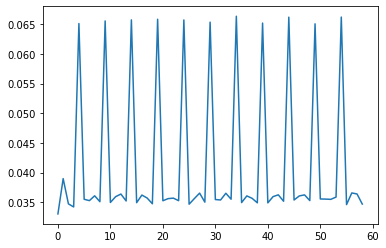

5


In [ ]:
import scipy.signal
def cryptanalyse_vigenere_findlength(s):
  '''Given just the string s, find out the length of the password using which
  some text has resulted in the string s. We just need to return the number
  k'''
  ls = []
  for r in range(1,60):
    ls.append(rotate_compare(s,r)) 
  plt.plot(ls)
  plt.show()
  for x in ls:
    if x > 0.060:
      return ls.index(x)+1

sol = cryptanalyse_vigenere_findlength(vigenere_encrypt(S,"daisy"))
print(sol)

In [ ]:
def cryptanalyse_vigenere(s):
    '''Given the string s cryptanalyse vigenere, outputs the password as well as
    the plaintext'''
    k = cryptanalyse_vigenere_findlength(s)
    password = cryptanalyse_vigenere_afterlength(s,k)
    plaintext = vigenere_decrypt(s,password)
    return f"Password is : {password} \nText is:\n{plaintext}"

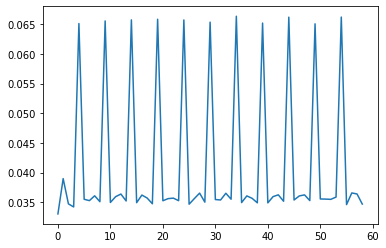

Password is : daisy 
Text is:
contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschapter


In [ ]:
print(cryptanalyse_vigenere(vigenere_encrypt(S,"daisy"))[:100])

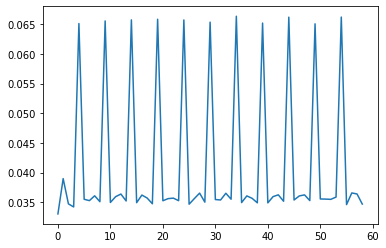

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f3 = open("decrypted.txt", "w")
f3.write(cryptanalyse_vigenere(vigenere_encrypt(S,"daisy")))
files.download("decrypted.txt")